# Exercise 1

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#import chi squared
from scipy.stats import chisquare
from scipy.stats import chi2
from tests import do_all_tests, LCG, chisquare_test, KS_test, run_test_1, run_test_2, run_test_3, correlation_coefficient
import plotly.io as pio
pio.renderers.default = "notebook+pdf"

 Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).

In [18]:
M = 2**31
a = 1103515245
c = 12345
N = 10000
k = 20
xval = 68

### 1
Write a program implementing a linear congruential generator
(LCG). Be sure that the program works correctly using only
integer representation.
#### a)
Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).

*Answer*
The numbers generated are constructed using the LCG algorithm, with the values above. 

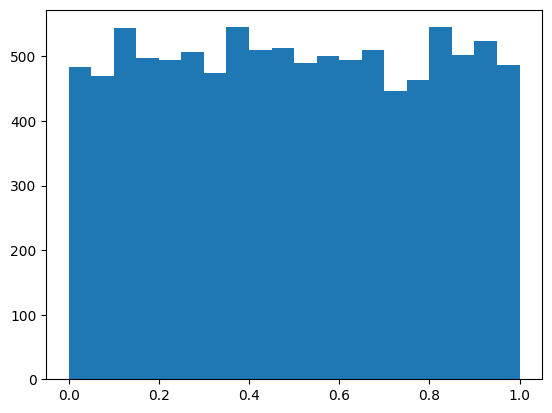

In [19]:
randn = LCG(xval, M,a,c, N)
#plot histogram of 20 classes
plt.hist(randn, bins=k)
plt.show()

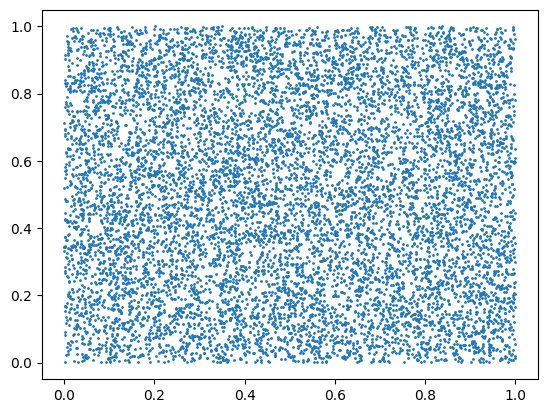

In [20]:
#scatter plot of random numbers U(i) vs U(i+1)
plt.scatter(randn[:-1],randn[1:], s=1)
plt.show()

Looks pretty random

In [21]:
testvals = do_all_tests(randn)

KS test: D = 0.9892886348426342 p-value = 1.0
Chi-square test: test = 518.4000000000001 p-value = 0.2652145064927258
Run test 1: test = 5026 p-value = 0.3085287356072869
Run test 2: test = 7.7058683332961255 p-value = 0.26045374876098304
Run test 3: test = -0.98039492696875 p-value = 0.32689121293197587
Correlation coefficient: c = 0.24905244657893708 p-value = 0.6673630775178978


All statistical tests are have a p-value greater than 0.05, which means that the numbers generated can be considered random. The only p-value that is even close to 0.05 is for the second run test, which would indicate that there's not sufficient alternation between up/down values.

#### c)
Repeat (a) and (b) by experimenting with different values
of “a”, “b” and “M”. In the end you should have a decent
generator. Report at least one bad and your final choice

In [22]:
#Bad choices
M = 16
a = 5
c = 1
N = 10000
k = 16
xval = 3

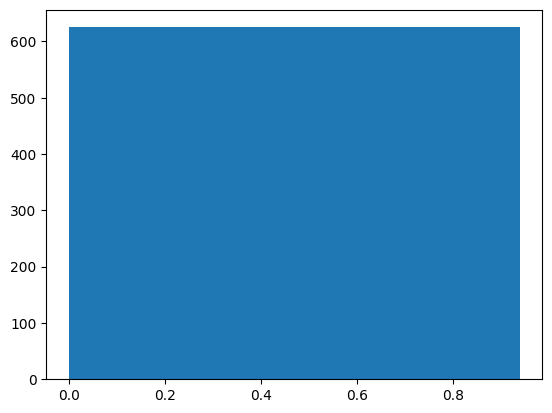

In [23]:
randn = LCG(xval, M,a,c, N)
#plot histogram of 20 classes
plt.hist(randn, bins=16)
plt.show()

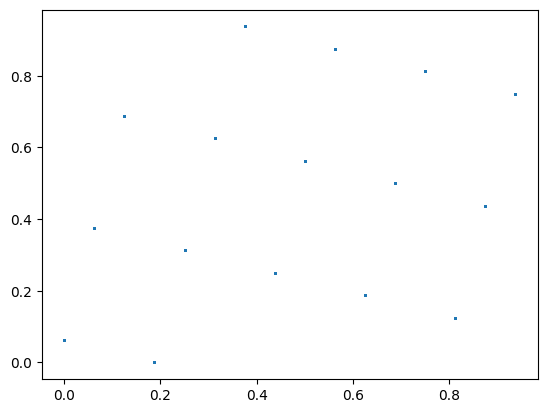

In [24]:
#scatter plot of random numbers U(i) vs U(i+1)
plt.scatter(randn[:-1],randn[1:], s=1)
plt.show()

Actually, even though values are uniformly distrubuted, the scatter plot shows that the sequence at which numbers are sampled, ISN'T random.

In [26]:
testvals = do_all_tests(randn)

KS test: D = 0.9984000000000001 p-value = 1.0
Chi-square test: test = 229375.0 p-value = 0.0
Run test 1: test = 3750 p-value = 1.0
Run test 2: test = 11846658.79821263 p-value = 0.0
Run test 3: test = -9.898826198103896 p-value = 0.0
Correlation coefficient: c = 0.216795703125 p-value = 0.0


The only test statistic that indicates randomness is the KS_test (p-value = 1.0), but it only tests the distribution of the numbers, but doesn't test for independence. In conclusion, the former choice of LCG parameters were better for generating pseudo random numbers.

### 2
Apply a system available generator and perform the various
statistical tests you did under Part 1 point (b) for this
generator too

In [31]:
#random numbers using numpy
randn = np.random.rand(N)

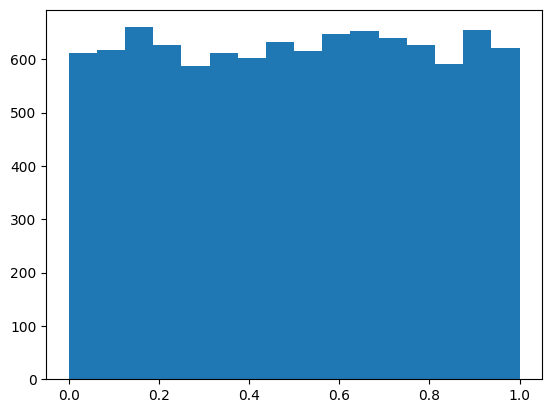

In [32]:
#plot histogram of 20 classes
plt.hist(randn, bins=16)
plt.show()

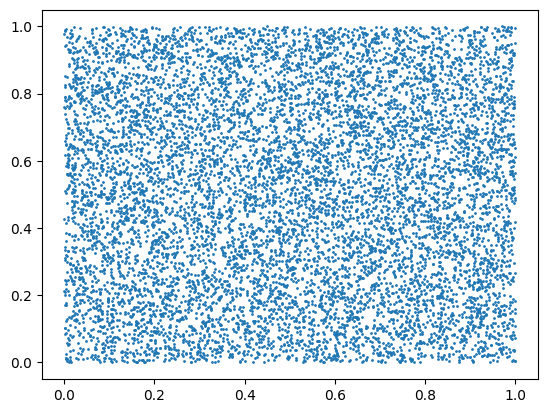

In [33]:
#scatter plot of random numbers U(i) vs U(i+1)
plt.scatter(randn[:-1],randn[1:], s=1)
plt.show()

In [34]:
testvals = do_all_tests(randn)

KS test: D = 0.9869793416642096 p-value = 1.0
Chi-square test: test = 506.69999999999993 p-value = 0.39605382558624513
Run test 1: test = 4989 p-value = 0.5948395239046171
Run test 2: test = 4.990488629282652 p-value = 0.54503360232468
Run test 3: test = 1.0120205697742082 p-value = 0.31152821840966327
Correlation coefficient: c = 0.2526587994871255 p-value = 0.227849072297867


For the system available generator all test statistics are insignificant, which means that the numbers generated can be considered random.

### 3
You were asked to simulate one sample and perform tests on
this sample. Discuss the sufficiency of this approach and take
action, if needed.

Actually it is better to perform the tests on multiple samples, because one test isn't sufficient to determine randomness of the numbers generated. Assuming that the samples generated are random, p-values should be uniformly distributed, across all tests, so there's a chance to sample numbers that don't pass the randomness test.